<a href="https://colab.research.google.com/github/jej24/INTERPOL/blob/master/INTERPOLACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/INTERPOLACION/'
os.chdir(path)
!pwd
%matplotlib inline

/content/drive/My Drive/PDI/INTERPOLACION


In [0]:
#Display four images

def display3(a,b,c,title1="Orginial", title2="Edited",title3="Orginial"):
    plt.figure(figsize=(3,3))
    plt.subplot(131), plt.imshow(a, cmap='gray'),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(132), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.subplot(133), plt.imshow(c, cmap='gray'), plt.title(title3)
    plt.xticks([]),plt.yticks([])
    plt.show()
    

def display22(a,b,title1="Orginial", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a, cmap='gray'),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.show()
    


def display3(a,b,c, title1="Orginial", title2="Edited", title3 = "Orginial"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]),plt.yticks([])
    plt.show()
    
def display2(a,b, title1="Orginial", title2="Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.show()
    

def readRGB(imagePath):
    img = cv2.imread(imagePath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

**INTERPOLACION NEAREST NEIGHBOUR**

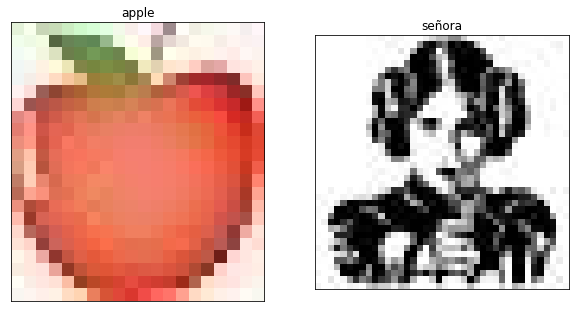

In [5]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx= 5, fy = 5, interpolation = cv2.INTER_NEAREST)
near_imgM = cv2.resize(imgM, None, fx= 5, fy = 5, interpolation = cv2.INTER_NEAREST)
display2(near_imgA, near_imgM, 'apple', 'señora')

**INTERPOLACION BILINEAR**

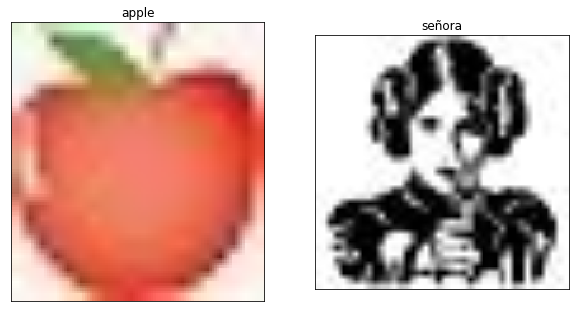

In [6]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx= 5, fy = 5, interpolation = cv2.INTER_LINEAR)
near_imgM = cv2.resize(imgM, None, fx= 5, fy = 5, interpolation = cv2.INTER_LINEAR)
display2(near_imgA, near_imgM, 'apple', 'señora')

**INTERPOLACION BICUBICA**

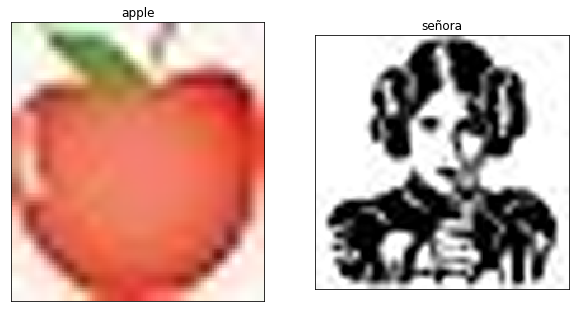

In [7]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx= 5, fy = 5, interpolation = cv2.INTER_CUBIC)
near_imgM = cv2.resize(imgM, None, fx= 5, fy = 5, interpolation = cv2.INTER_CUBIC)
display2(near_imgA, near_imgM, 'apple', 'señora')

**DOMINIO ESPACIAL**


P(X,Y) tranforma aparir de una operación.


**FILtros espaciales (MASCARAS) **

para modificar los pixeles creo mascaras (con tamaños impares, para poder tener un centro).(3x3, 5x5)


EL RESULTADO VA A ESTAR PARA EL CENTRO





*MATRIZ IDENTIDAD AL SER MULTIPLICADA RESULTA LA MATRIZ ORIGINAL*

TRANSFORMACION NEGATIVA (INVIERTE LOS COLORES)

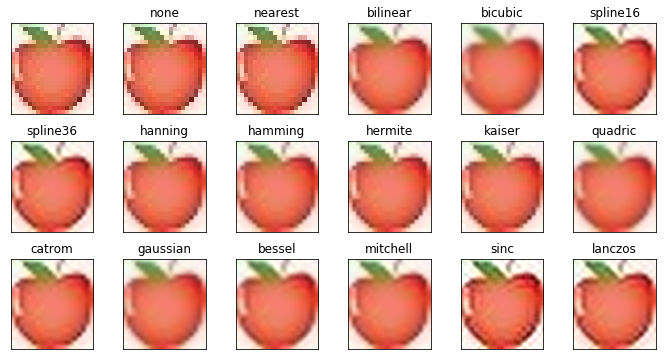

In [8]:
methods = [None, 'none','nearest','bilinear','bicubic','spline16','spline36','hanning','hamming','hermite','kaiser','quadric','catrom','gaussian','bessel','mitchell','sinc','lanczos']
grid=imgA
fig, axes=plt.subplots(3,6, figsize=(12,6),subplot_kw={'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
  ax.imshow(grid, interpolation=interp_method)
  ax.set_title(interp_method)
  
plt.show()


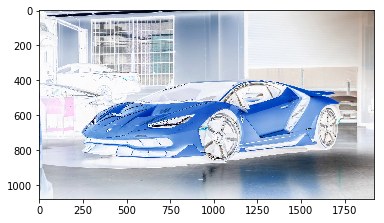

In [9]:
from PIL import Image

foto = Image.open('INTER.jpg')

datos = list(foto.getdata())

datos_invertidos = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]
                   
imagen_invertida = Image.new('RGB', foto.size)
                   
imagen_invertida.putdata(datos_invertidos)
                   
plt.imshow(np.asarray(imagen_invertida))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

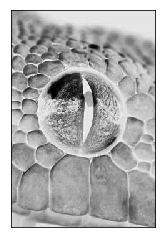

In [10]:
from PIL import Image

foto = Image.open('ojo.jpg')

datos = list(foto.getdata())

datos_invertidos = [255 - x for x in datos]
                   
imagen_invertida = Image.new('L', foto.size)
                   
imagen_invertida.putdata(datos_invertidos)
                   
plt.imshow(np.asarray(imagen_invertida), cmap = 'gray')
plt.xticks([]),plt.yticks([])

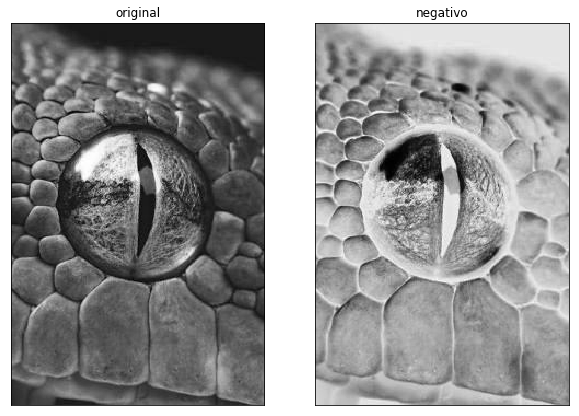

In [11]:
def negative(l):
  
    img = cv2.imread("ojo.jpg", cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2 = np.zeros((rows, columns), dtype = np.uint8)
    for x in range(rows):
        for y in range(columns):
            img2[x, y] = (l-1) - img[x,y]
            
    display22(img, img2, 'original', 'negativo')
    return
  
negative(256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


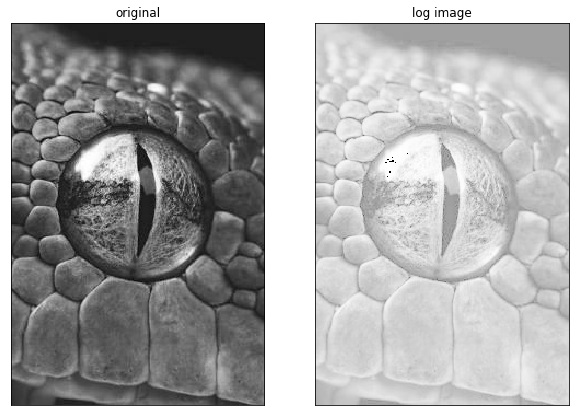

In [12]:
import cv2
import numpy as np

img = cv2.imread('ojo.jpg')

#apply log tranform

img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255

#specify the dat type

img_log = np.array(img_log, dtype= np.uint8)

#display the image

display22(img, img_log, 'original', 'log image')

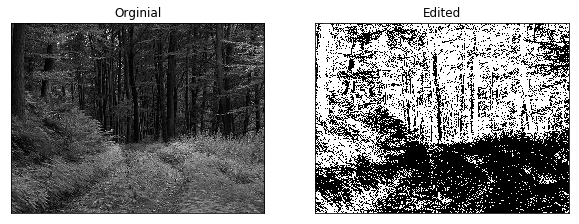

In [22]:
def binarizacion(img,minr=10, maxr=60):
  
    img = cv2.imread(img, 0)
    # Find width and height of image
    row, column = img.shape
    
    #create an zeros array to store the sliced image
    
    img1 = np.zeros((row,column), dtype = 'uint8')
     
    #Specify the min and max range
    
    min_range = minr
    max_range = maxr
    
    #loop over the input image and if pixel value lies in 
    for i in range(row):
        for j in range(column):
            if img[i,j]>min_range and img[i,j]<max_range:
                img1[i,j] = 255
            else:
                img1[i,j] = 0
    
    #display the image
    
    display22(img, img1)
binarizacion('tree.png',10,60)    

***FRACCIONAMIENTO ***

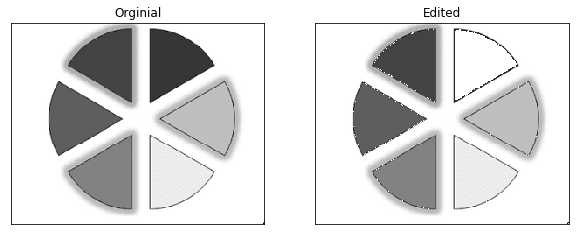

In [41]:
def Fraccionamiento(img, minr=10, maxr=60):
    #cargar imagen
    img = cv2.imread(img, 0)
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype= np.uint8)

    #intervalos

    a = minr
    b = maxr

    for x in range(0, rows):
        for y in range(0, columns):
            r = img[x][y]
            if a <=r and r<=b:
                img2[x][y] = 255
            else:
                img2[x][y] = img[x][y]
    display22(img,img2)
    return
  
Fraccionamiento('pastel.png', 50, 58)

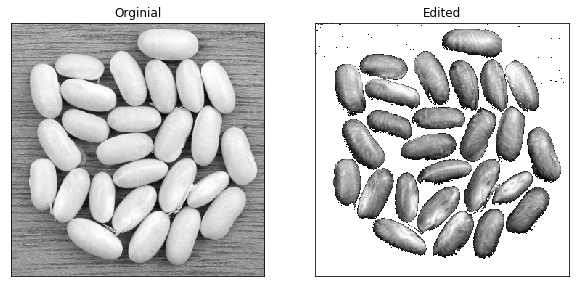

In [78]:
def Fraccionamiento(img, minr=10, maxr=60):
    #cargar imagen
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype= np.uint8)

    #intervalos

    a = minr
    b = maxr

    for x in range(0, rows):
        for y in range(0, columns):
            r = img[x][y]
            if a <=a and r<=b:
                img2[x][y] =  255      
            else:             
                img2[x][y] = img[x][y]
                
    display22(img,img2)
   # return
  
Fraccionamiento('frijol.jpg', 20, 195)

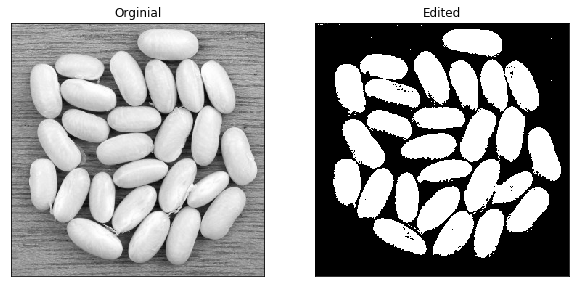

In [71]:
def binarizacion(img,minr=10, maxr=60):
  
    img = cv2.imread(img, 0)
    # Find width and height of image
    row, column = img.shape
    
    #create an zeros array to store the sliced image
    
    img1 = np.zeros((row,column), dtype = 'uint8')
     
    #Specify the min and max range
    
    min_range = minr
    max_range = maxr
    
    #loop over the input image and if pixel value lies in 
    for i in range(row):
        for j in range(column):
            if img[i,j]>min_range and img[i,j]<max_range:
                img1[i,j] = 255
            else:
                img1[i,j] = 0
    
    #display the image
    
    display22(img, img1)
    
binarizacion('frijol.jpg',200,255)    

**BINARIZACION POR UMBRAL**

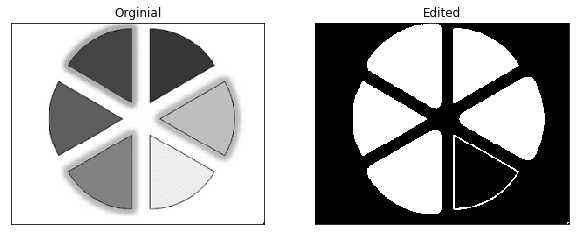

In [81]:
def threshold(img, thres):
  
    #cargar imagen
    img = cv2.imread(img, 0)
    rows, columns = img.shape
    img2 = np.zeros( (rows, columns), dtype = np.uint8)
    
    #intervalos 
    T =  thres
    
    for x in range(0, rows):
        for y in range(0,columns):
            r = img[x][y]
            if T<=r:
                img2[x][y] = 0
            else:
                img2[x][y] = 255
    display22(img, img2)
    return
  
threshold('pastel.png', 220)

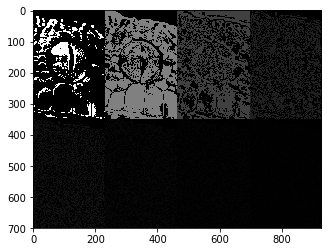

In [82]:
img = cv2.imread('ojo.jpg',0)
 
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
plt.imshow(final,cmap='gray')

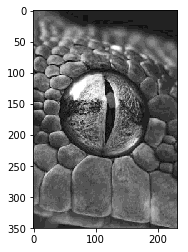

In [83]:
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
plt.imshow(new_img,cmap='gray')

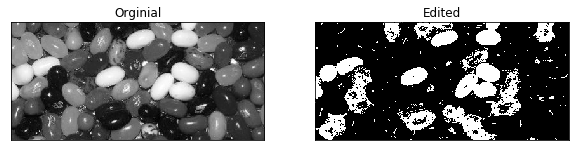

In [129]:
def binarizacion(img,minr=10, maxr=60, minr2=0,maxr2=10):
  
    img = cv2.imread('dulces2.jpg',0)
    # Find width and height of image
    row, column = img.shape
    
    #create an zeros array to store the sliced image
    
    img1 = np.zeros((row,column), dtype = 'uint8')
     
    #Specify the min and max range
    
    min_range = minr
    max_range = maxr
    
    min_range2 = minr2
    max_range2 = maxr2
    
    #loop over the input image and if pixel value lies in 
    for i in range(row):
        for j in range(column):
            if img[i,j]>minr and img[i,j]<maxr or img[i,j]>minr2 and img[i,j]<maxr2:
               img1[i,j] = 255 
            
            else:
                img1[i,j] = 0
            
                
    
    
    #display the image
    
    display22(img, img1)
    
binarizacion('dulces2.jpg',0,25,200,255)    

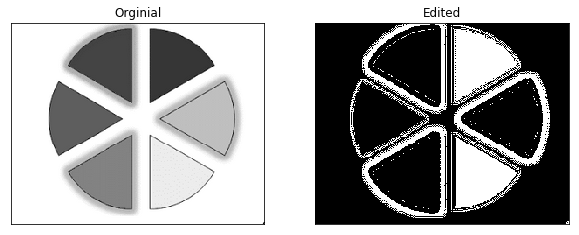

In [117]:
def binarizacion(img,minr=10, maxr=60, minr2=0,maxr2=10):
  
    img = cv2.imread(img, 0)
    # Find width and height of image
    row, column = img.shape
    
    #create an zeros array to store the sliced image
    
    img1 = np.zeros((row,column), dtype = 'uint8')
     
    #Specify the min and max range
    
    min_range = minr
    max_range = maxr
    
    min_range2 = minr2
    max_range2 = maxr2
    
    #loop over the input image and if pixel value lies in 
    
    for i in range(row):
        for j in range(column):
            if img[i,j]>min_range and img[i,j]<max_range or img[i,j]>min_range2 and img[i,j]<max_range2:
                img1[i,j] = 255
            else:
                img1[i,j] = 0
          
          
          
          #if img[i,j]>230 and img[i,j]<255:
                  
                #img1[i,j] = 255 
    
    #display the image
    
    display22(img, img1)
    
binarizacion('pastel.png',0,58,200,255)    